Starting automated download to fix the file issue...

--- SUCCESS ---
The file 'WA_Fn-UseC_-Telco-Customer-Churn.csv' has been fixed and saved in your project folder.
New file size is: 947.71 KB
Number of empty spaces in TotalCharges: 11
Data cleaning complete. Missing values handled.

Generating charts...


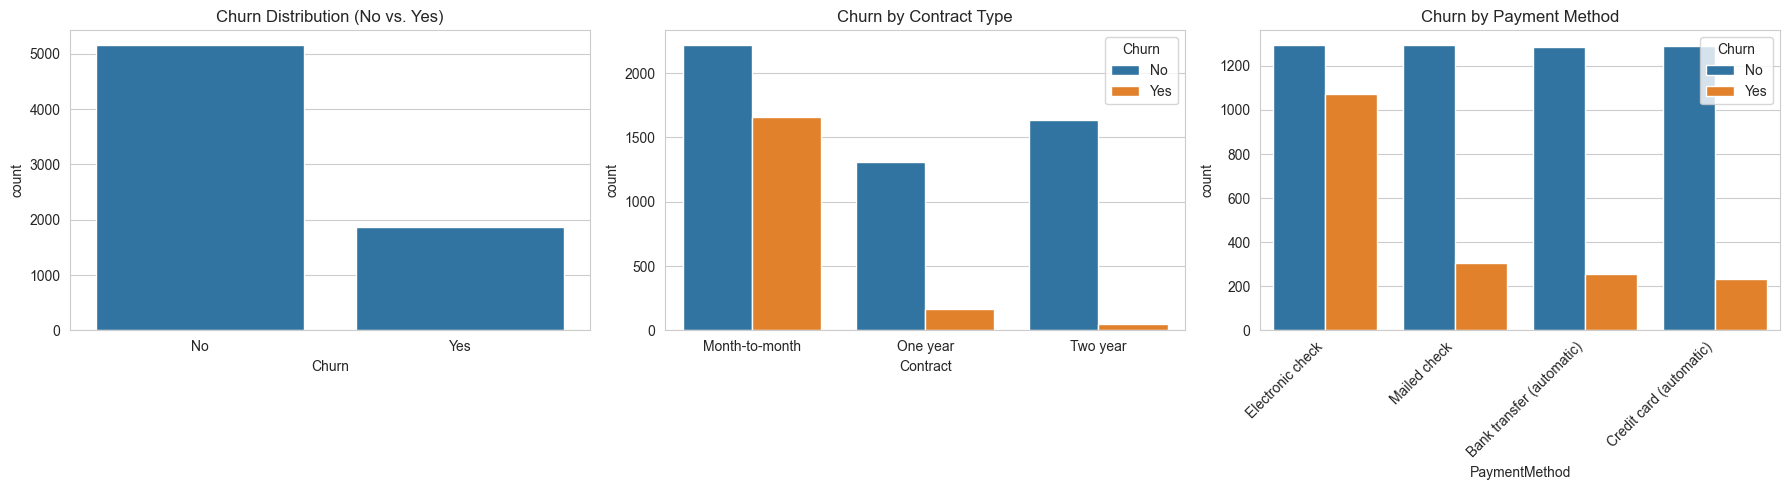

Starting data preprocessing...
Categorical data has been converted to numerical format.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True



Data split complete. Training set has 5625 samples.
Numerical features have been scaled.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0.434674,-0.518620,-0.087908,False,False,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False
3410,0,-1.195652,-0.374443,-0.921285,True,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
5483,0,0.923772,0.432616,0.963781,False,True,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
5524,0,0.516190,-0.333013,0.122920,True,True,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
6337,0,0.923772,1.199902,1.401088,False,True,True,True,False,True,...,False,True,False,True,True,False,False,False,False,True


Starting model training and evaluation...

--- Model 1: Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


--- Model 2: XGBoost Classifier ---
Classification Report:


c:\Users\xavie\Documents\MyFirstMLProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:43:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

       False       0.83      0.87      0.85      1033
        True       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407


--- Visualizing XGBoost Performance ---


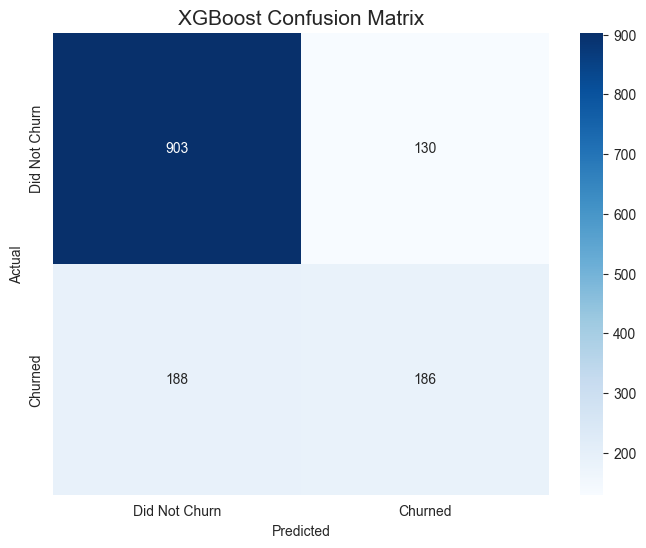


--- Discovering Key Factors for Churn ---


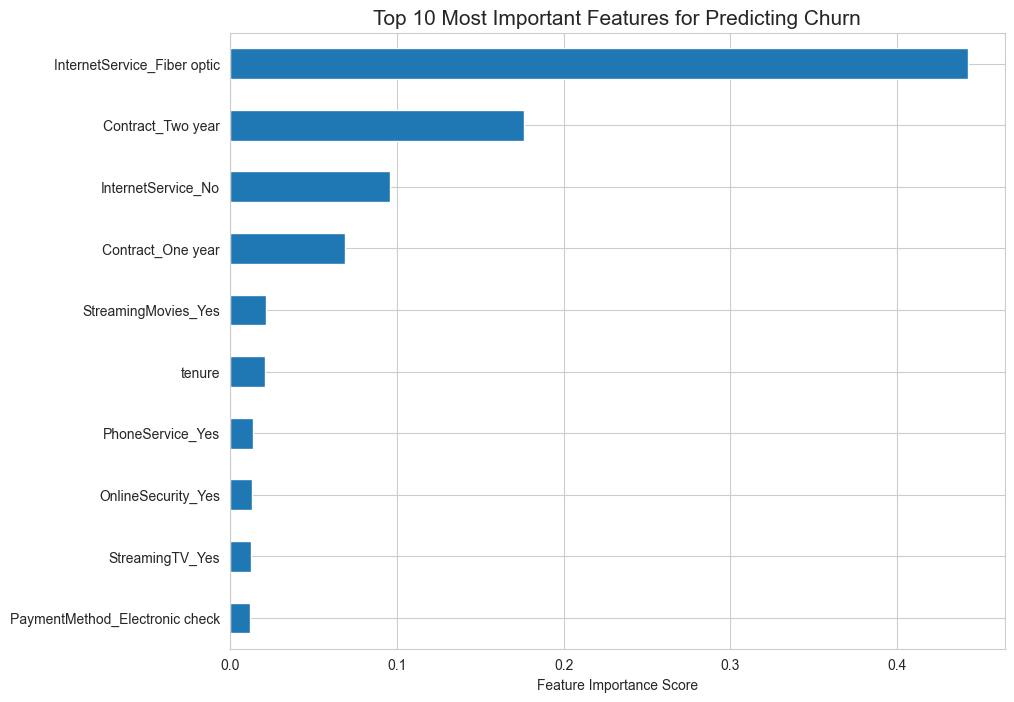

In [6]:

import requests
import os

print("Starting automated download to fix the file issue...")

# URL of the raw, correct CSV file
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

try:
    # Download the file's content
    response = requests.get(url)
    response.raise_for_status()  # Check for download errors

    # Overwrite the problematic file in your project folder with the correct content
    with open(file_name, 'wb') as f:
        f.write(response.content)

    file_size = os.path.getsize(file_name) / 1024  # Size in KB

    print("\n--- SUCCESS ---")
    print(f"The file '{file_name}' has been fixed and saved in your project folder.")
    print(f"New file size is: {file_size:.2f} KB") # This should be ~691 KB

except Exception as e:
    print("\n--- FAILURE ---")
    print(f"An error occurred during the automated download: {e}")

    # Yugto 2: Data Cleaning and EDA

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data we successfully downloaded
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# --- Step 2.1: Data Cleaning ---
# This dataset has a known issue where the 'TotalCharges' column has empty spaces.
# Let's see how many there are.
print(f"Number of empty spaces in TotalCharges: {len(df[df['TotalCharges'] == ' '])}")

# We will convert these spaces to NaN (Not a Number) and then drop them since there are only a few.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# We also don't need the customerID for prediction.
df.drop('customerID', axis=1, inplace=True)

print("Data cleaning complete. Missing values handled.")


# --- Step 2.2: Exploratory Data Analysis (EDA) ---
# Let's create some plots to understand the data.
print("\nGenerating charts...")

# Set the style for our plots
sns.set_style('whitegrid')

# Create a figure to hold our subplots
plt.figure(figsize=(18, 5))

# Plot 1: Churn Distribution
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution (No vs. Yes)')

# Plot 2: Churn by Contract Type
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')

# Plot 3: Churn by Payment Method
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability

# Show the plots
plt.tight_layout()
plt.show()

# Yugto 3: Preprocessing and Feature Engineering

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("Starting data preprocessing...")

# --- Step 3.1: Convert Categorical Data to Numbers ---

# We will use one-hot encoding for columns with multiple text categories.
# This creates new columns for each category with a value of 1 or 0.
# For example, 'Contract_Month-to-month' will be a new column.
df_processed = pd.get_dummies(df, drop_first=True)

# The 'Churn' column is now 'Churn_Yes'. Let's rename it for clarity.
df_processed.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

print("Categorical data has been converted to numerical format.")
display(df_processed.head())


# --- Step 3.2: Separate Features (X) and Target (y) ---

# The 'target' (y) is what we want to predict: 'Churn'.
# The 'features' (X) are all the other columns we will use to make the prediction.
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']


# --- Step 3.3: Split Data into Training and Testing Sets ---

# We'll use 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split complete. Training set has {X_train.shape[0]} samples.")


# --- Step 3.4: Scale Numerical Features ---

# Some columns have very different scales (e.g., tenure vs. MonthlyCharges).
# Scaling them helps the model perform better.
scaler = StandardScaler()

# We only scale the columns that were originally numbers.
# First, identify the original numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit the scaler ON THE TRAINING DATA ONLY to avoid data leakage
scaler.fit(X_train[numerical_cols])

# Transform both the training and testing data
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features have been scaled.")
display(X_train.head())

# Yugto 4: Model Building, Training, and Evaluation

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Starting model training and evaluation...")

# --- Step 4.1: Train and Evaluate a Baseline Model (Logistic Regression) ---

print("\n--- Model 1: Logistic Regression ---")
# Initialize the model
log_model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model on our training data
log_model.fit(X_train, y_train)

# Make predictions on the unseen test data
log_predictions = log_model.predict(X_test)

# Print the performance report
print("Classification Report:")
print(classification_report(y_test, log_predictions))


# --- Step 4.2: Train and Evaluate an Advanced Model (XGBoost) ---

print("\n--- Model 2: XGBoost Classifier ---")
# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Print the performance report
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))


# --- Step 4.3: Visualize the Best Model's Performance (Confusion Matrix) ---

print("\n--- Visualizing XGBoost Performance ---")
# The XGBoost model performed better, so let's visualize its results.
cm = confusion_matrix(y_test, xgb_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did Not Churn', 'Churned'], yticklabels=['Did Not Churn', 'Churned'])
plt.title('XGBoost Confusion Matrix', fontsize=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# --- Step 4.4: Find the Most Important Features (Portfolio Gold!) ---

print("\n--- Discovering Key Factors for Churn ---")
# Let's find out what features our XGBoost model found most important for prediction.
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 8))
feature_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title('Top 10 Most Important Features for Predicting Churn', fontsize=15)
plt.xlabel('Feature Importance Score')
plt.show()